In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import seaborn as sns

In [2]:
global mu10,mu20,mu1,mu2,lambda1,lambda2,gamma,D,eta,kappa

In [3]:
def TwoSpecies(t,y):
    s1=y[0]
    s2=y[1]
    dydt=[mu1*s1*(1-s1-gamma*s2)-D*s1,
        mu2*s2*(1-s2-gamma*s1)-D*s2]
    return dydt

In [4]:
def TwoSpeciesHGT(t,y):
    s1=y[0]
    s2=y[1]
    p1=y[2]
    p2=y[3]
    mu1=mu10*(1+lambda1)
    mu2=mu20*(1+lambda2)
    dydt=[mu1/s1*(s1+lambda2*p1)*s1*(1-s1-gamma*s2)-D*s1,
        mu2/s2*(s2+lambda1*p2)*s2*(1-gamma*s1-s2)-D*s2,
        mu1*(1+lambda2)*p1*(1-s1-gamma*s2)+eta*(s2+p1)*(s1-p1)-kappa*p1-D*p1,
        mu2*(1+lambda1)*p2*(1-gamma*s1-s2)+eta*(s1+p2)*(s2-p2)-kappa*p2-D*p2]
    return dydt

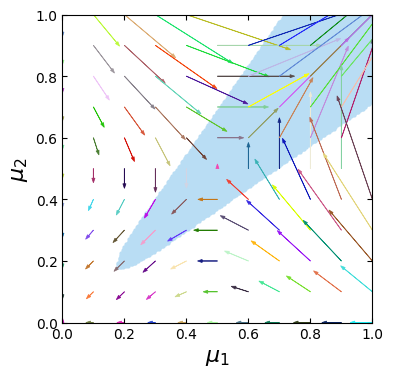

In [5]:
gamma=0.99
D=0.2
kappa=0.05

mu1s=np.arange(0,1.005,0.005)
mu2s=np.arange(0,1.005,0.005)
mu10=0.5
mu20=0.5
initial=[0.5,0.5]
timespan=np.arange(0,80.1,0.1)
S1Abun=np.zeros((len(mu1s),len(mu2s)))
S2Abun=np.zeros((len(mu1s),len(mu2s)))

thresh=0.01

for i in range(len(mu1s)):
    mu1=mu1s[i]
    for j in range(len(mu2s)):
        mu2=mu2s[j]
        sol=solve_ivp(TwoSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
        y1=np.transpose(sol.y)
        S1Abun[i,j]=y1[-1,0]
        S2Abun[i,j]=y1[-1,1]

plt.figure(figsize=(4,4))
XX=S1Abun
YY=S2Abun
for i in range(len(mu1s)):
    for j in range(len(mu2s)):
        if min(XX[i,j],YY[i,j])>thresh:
            plt.plot(mu1s[i],mu2s[j],'o',markersize=2,color=np.divide([186,222,245],256),zorder=0)
plt.xlabel('$\mu_1$',fontsize=16)
plt.ylabel('$\mu_2$',fontsize=16)
plt.tick_params(direction='in',top='true',right='true')
plt.xlim([0,1])
plt.ylim([0,1])

mu1s=np.arange(0,1.1,0.1)
mu2s=np.arange(0,1.1,0.1)
lambda1s=mu1s/mu10-1
lambda2s=mu2s/mu20-1
timespan=np.arange(0,20.1,0.1)
initial=[0.5,0.5,0,0]
eta=0.2


for i in range(len(mu1s)):
        lambda1=lambda1s[i]
        for j in range(len(mu2s)):
            lambda2=lambda2s[j]
            sol=solve_ivp(TwoSpeciesHGT,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
            y=np.transpose(sol.y)
            mu1e=mu10*(1+lambda1)/y[-1,0]*(y[-1,0]+lambda2*y[-1,2])
            mu2e=mu20*(1+lambda2)/y[-1,1]*(y[-1,1]+lambda1*y[-1,3])

            plt.arrow(mu1s[i],mu2s[j],mu1e-mu1s[i],mu2e-mu2s[j],head_width=0.01,color=np.random.rand(3,),linewidth=0.5,zorder=1)       
plt.savefig('ArrawInPhaseDiagram2.pdf')
plt.show()